In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [5]:
import tensorflow
from tensorflow.keras.layers import ReLU,LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras import models

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[5567]

array([1], dtype=uint8)

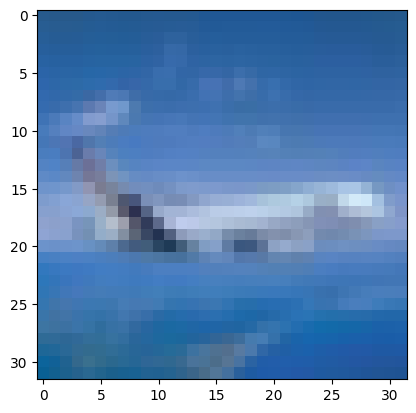

In [10]:
plt.imshow(X_train[5657])

In [11]:
## normalize the images

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
X_train_scaled[1][2]

array([[0.54901961, 0.60784314, 0.64313725],
       [0.54509804, 0.57254902, 0.58431373],
       [0.45098039, 0.45098039, 0.43921569],
       [0.57647059, 0.6       , 0.62352941],
       [0.54117647, 0.58823529, 0.63529412],
       [0.51764706, 0.56862745, 0.60392157],
       [0.66666667, 0.72156863, 0.74509804],
       [0.69803922, 0.74117647, 0.75294118],
       [0.67058824, 0.69019608, 0.68627451],
       [0.75294118, 0.76470588, 0.74117647],
       [0.85882353, 0.85490196, 0.85098039],
       [0.91764706, 0.91372549, 0.93333333],
       [0.89803922, 0.92941176, 0.92156863],
       [0.9372549 , 0.96078431, 0.94901961],
       [0.95686275, 0.95686275, 0.94901961],
       [0.96470588, 0.94901961, 0.94509804],
       [0.90980392, 0.90588235, 0.89019608],
       [0.88235294, 0.88627451, 0.87058824],
       [0.92156863, 0.92156863, 0.90980392],
       [0.95294118, 0.95294118, 0.94901961],
       [0.69411765, 0.69411765, 0.69803922],
       [0.39607843, 0.4       , 0.38039216],
       [0.

In [49]:
model = Sequential()



model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [51]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#model.compile(optimizer='adam', loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #metrics=['accuracy'])

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
history  = model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.30)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 62s 55ms/step - accuracy: 0.3028 - loss: 1.8706 - val_accuracy: 0.4873 - val_loss: 1.4350
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 60s 54ms/step - accuracy: 0.5297 - loss: 1.3144 - val_accuracy: 0.5743 - val_loss: 1.1949
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 77s 50ms/step - accuracy: 0.6004 - loss: 1.1252 - val_accuracy: 0.6156 - val_loss: 1.1053
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.6471 - loss: 1.0022 - val_accuracy: 0.6463 - val_loss: 1.0233
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 58s 53ms/step - accuracy: 0.6651 - loss: 0.9401 - val_accuracy: 0.6542 - val_loss: 1.0058
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.6934 - loss: 0.8653 - val_accuracy: 0.6511 - val_loss: 1.0198
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.7198 - loss: 0.7960 - val_accuracy: 0.6835 - val_loss: 0.9310
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.7405 -

In [55]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

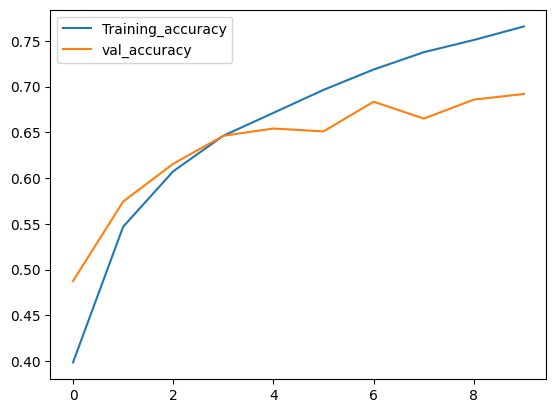

In [56]:
plt.plot(history.history['accuracy'], label = 'Training_accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.legend()


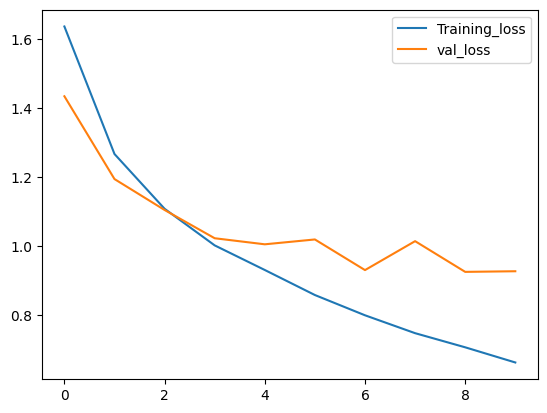

In [57]:
plt.plot(history.history['loss'], label = 'Training_loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()

In [58]:
prob = model.predict(X_test_scaled)
y_pred = np.argmax(prob,axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [59]:
prob.shape

(10000, 10)

In [60]:
X_test_scaled.shape

(10000, 32, 32, 3)

In [61]:
y_test[0]

array([3], dtype=uint8)

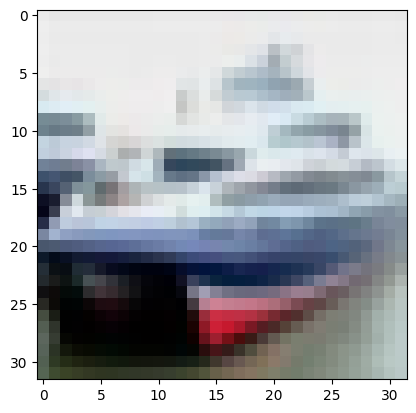

In [62]:
plt.imshow(X_test_scaled[1])

In [63]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [64]:
# 1. Predict probabilities
y_pred_probs = model.predict(X_test_scaled)  # Shape: (10000, 10)

# 2. Get predicted classes
y_pred = np.argmax(y_pred_probs, axis=1)     # Shape: (10000,)

# 3. Check one prediction
print("Predicted label for image 1:", y_pred[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Predicted label for image 1: 3


In [65]:
clf_report = classification_report(y_pred,y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1054
           1       0.73      0.89      0.80       830
           2       0.60      0.56      0.58      1069
           3       0.56      0.48      0.52      1153
           4       0.63      0.68      0.65       937
           5       0.52      0.66      0.58       787
           6       0.78      0.75      0.77      1041
           7       0.77      0.71      0.73      1085
           8       0.77      0.82      0.79       942
           9       0.82      0.74      0.78      1102

    accuracy                           0.69     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [66]:
accuracy_score(y_pred,y_test)

0.6929